<a href="https://colab.research.google.com/github/jie786389209/DL-demo/blob/master/keras_lianxi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import sys
import random

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import seaborn as sns
sns.set_style("white")
%matplotlib inline
import cv2
from sklearn.model_selection import train_test_split
from tqdm import tqdm_notebook
from itertools import chain
from skimage.io import imread, imshow
from skimage.transform import resize
from skimage.morphology import label

from keras.models import Model, load_model, save_model
from keras.layers import Input, Dropout, BatchNormalization, Activation, Add
from keras.layers.core import Lambda
from keras.layers.convolutional import Conv2D, Conv2DTranspose
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras import backend as K
from keras import optimizers

import tensorflow as tf
from keras.preprocessing.image import array_to_img, img_to_array, load_img

import time 
t_start = time.time()



Using TensorFlow backend.


In [2]:
tf.__version__

'1.13.1'

In [3]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

print("x_train:",x_train.shape)
print("x_test:",x_test.shape)

11493376/11490434 [==============================] - 0s 0us/step
x_train: (60000, 28, 28)
x_test: (10000, 28, 28)


In [0]:
dataset = tf.data.Dataset.from_tensor_slices(x_train)

dataset = dataset.batch(100).repeat()

#iterator = dataset.make_one_shot_iterator()
#element = iterator.get_next()
#plt.imshow(element)


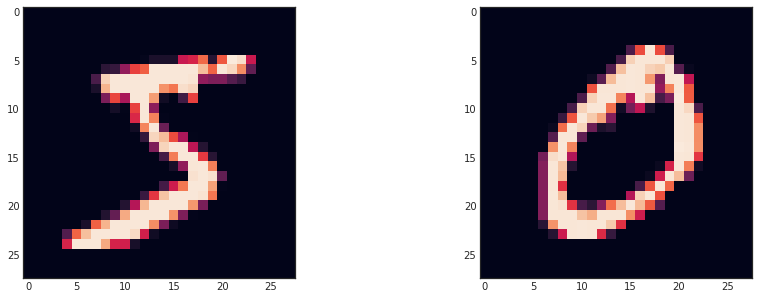

In [5]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
ax[0].imshow(x_train[0])
ax[1].imshow(x_train[1])

In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10,activation=tf.nn.softmax)
])

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [7]:

#os.chdir(./)
print(os.getcwd())
os.mkdir("model_save")
os.chdir("model_save")
print(os.getcwd())


/content
/content/model_save


In [24]:
checkpoint_path = os.getcwd()
checkpoint_path = checkpoint_path + "-{epoch:02d}"
print(checkpoint_path)



/content/model_save-{epoch:02d}


In [25]:

#model.save('my_model.h5')
cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path, save_weights_only=True, verbose=1,
                                                period=1)
model.fit(x_train, y_train, epochs=5, batch_size=100,steps_per_epoch=60,
         validation_data = (x_test,y_test),
         callbacks=[cp_callback],
         use_multiprocessing=True, workers=2
         )
#model.evaluate(x_test, y_test)

Epoch 1/5
59/60 [============================>.] - ETA: 0s - loss: 0.0667 - acc: 0.9805
Epoch 00001: saving model to /content/model_save-01

Consider using a TensorFlow optimizer from `tf.train`.
60/60 [==============================] - 10s 160ms/step - loss: 0.0667 - acc: 0.9805 - val_loss: 0.0812 - val_acc: 0.9744
Epoch 2/5
59/60 [============================>.] - ETA: 0s - loss: 0.0611 - acc: 0.9822
Epoch 00002: saving model to /content/model_save-02

Consider using a TensorFlow optimizer from `tf.train`.
60/60 [==============================] - 10s 161ms/step - loss: 0.0610 - acc: 0.9822 - val_loss: 0.0788 - val_acc: 0.9746
Epoch 3/5
59/60 [============================>.] - ETA: 0s - loss: 0.0561 - acc: 0.9836
Epoch 00003: saving model to /content/model_save-03

Consider using a TensorFlow optimizer from `tf.train`.
60/60 [==============================] - 9s 157ms/step - loss: 0.0561 - acc: 0.9836 - val_loss: 0.0771 - val_acc: 0.9757
Epoch 4/5
59/60 [============================>.